In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
# Define the number of points and boundaries
y_min = -200
y_max = 200
x_min = -200
x_max = 600
radius = 40
first_layer_height = 0.00005

lb_num_points = 75 # left boundary
tb_num_points = 150 # top boundary
cb_num_points = 180 # cylinder boundary
num_boundary_layers = 63 # layers around the cylinder boundary

grid_y_coords = np.linspace(y_min, y_max, lb_num_points)
grid_x_coords = np.linspace(x_min, x_max, tb_num_points)

# Create arrays to hold the x, y, and z coordinates
lb_coords = np.zeros((lb_num_points, 3))
cb_coords = np.zeros((cb_num_points, 3))
bl_coords = np.zeros((cb_num_points*num_boundary_layers, 3))

lb_coords[:, 0] = x_min 
lb_coords[:, 1] = grid_y_coords  

theta_coords = np.linspace(0, 2*np.pi, cb_num_points, endpoint=False)
#print(theta_coords*180/np.pi)
cb_coords[:, 0] = radius * np.cos(theta_coords)
cb_coords[:, 1] = radius * np.sin(theta_coords)

for i in range(num_boundary_layers):
    radius = radius + first_layer_height * 1.2**i
    if (i==0): print(f'radius: {radius}')
    bl_coords[i*cb_num_points:(i+1)*cb_num_points, 0] = radius * np.cos(theta_coords)
    bl_coords[i*cb_num_points:(i+1)*cb_num_points, 1] = radius * np.sin(theta_coords)
    bl_coords[i*cb_num_points:(i+1)*cb_num_points, 2] = 0

X, Y = np.meshgrid(grid_x_coords, grid_y_coords)
all_grid_coords = np.vstack((X.flatten(), Y.flatten())).T
distances = np.sqrt(all_grid_coords[:,0]**2 + all_grid_coords[:,1]**2)
filtered_coordinates = all_grid_coords[(distances >= 63)*(all_grid_coords[:,0]>-200)] # bl ends at r=60.25
grid_coords = np.hstack((filtered_coordinates, np.zeros((filtered_coordinates.shape[0], 1))))

radius: 40.00005


length: 10746


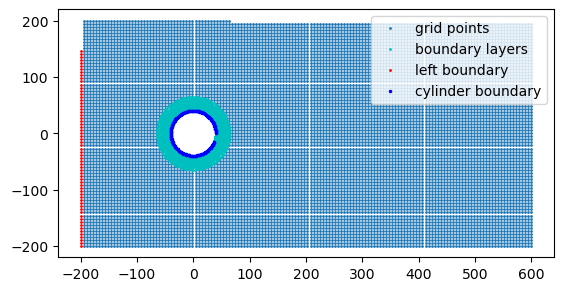

In [81]:
fig, ax = plt.subplots()
ax.set_aspect('equal', 'box')
print(f'length: {len(grid_coords)}')
#bl_subset = bl_coords[np.random.choice(bl_coords.shape, 100, replace=False),:]

plt.plot(grid_coords[:-100,0],grid_coords[:-100,1] ,'.', ms = 2, label='grid points')
plt.plot(bl_coords[:,0], bl_coords[:,1],'.c', ms =2, label='boundary layers')
plt.plot(lb_coords[:-10,0],lb_coords[:-10,1] ,'.r', ms = 2, label='left boundary')
plt.plot(cb_coords[:-10,0],cb_coords[:-10,1] ,'.b', ms = 3, label='cylinder boundary')
plt.legend()


In [22]:
points = np.vstack((lb_coords, cb_coords, bl_coords, grid_coords))
print(len(points))

22341


In [10]:
np.savetxt("points.csv", points, delimiter=",", comments="")